In [1]:
from vox.numpy.transform_3d.rand_aug import *
import numpy as np
import nibabel as nib
from vox.viz import grid_view
from vox.utils import one_hot
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,10)

vox_path = '../asset/data/sa.nii.gz'
vox_gt_path = '../asset/data/sa_gt.nii.gz'
ED = 0
ES = 7

In [2]:
def read_nii_gz(path):
    nib_vol = nib.load(path)
    data = nib_vol.get_fdata()
    affine = nib_vol.affine
    return nib_vol, data, affine

In [3]:
vox, vox_data, vox_affine = read_nii_gz(vox_path)
vox_gt, vox_gt_data, vox_gt_affine = read_nii_gz(vox_gt_path)

In [4]:
print('vox data: ', vox_data.shape)
print('vox gt data: ', vox_gt_data.shape)
vox_ed_data = vox_data[:, :, :, ED]
vox_gt_ed_data = vox_gt_data[:, :, :, ED]
print('vox ed data: ', vox_ed_data.shape)
print('vox gt ed data: ', vox_gt_ed_data.shape)

vox data:  (208, 256, 12, 25)
vox gt data:  (208, 256, 12, 25)
vox ed data:  (208, 256, 12)
vox gt ed data:  (208, 256, 12)


In [5]:
class Opts(object):
    max_val = 16383
    M = 1.0
    aug_sharp_sigma = [0.1, 0.4]

    def __init__(self):
        self._dict = {
            'max_val': self.max_val,
            'M': self.M,
            'aug_sharp_sigma': self.aug_sharp_sigma
        }
    
    def get(self, name, default=None):
        if name in self._dict.keys():
            return self._dict[name]
        else:
            return default

In [6]:
opt = Opts()
aug_ops = [#   OP      minval maxval
#            (IdentityOps(opt), None, None),
#            (ResizeOps(opt), 0.7, 1.3),
#            (HistEqualOps(opt), 0, 0.012),
#            (GaussianBlurOps(opt), 0, 0.6),
#            (NoiseOps(opt), 0, 0.1),
#            (FlipZOps(opt), None, None),
#            (FlipYOps(opt), None, None),
#            (FlipXOps(opt), None, None),
#            (TranslateXOps(opt), 0, 0.2),
#            (TranslateYOps(opt), 0, 0.2),
#            (ShearXOps(opt), 0.0, -0.3),
#            (ShearYOps(opt), 0.0, -0.3),
#            (RotateOps(opt), 0.0, np.pi/6),
#            (HigherContrastOps(opt), 0.0, 2.3),
#            (LowerContrastOps(opt), 1, 1.3),
           (SharpOps(opt), 0, 2.5)
]

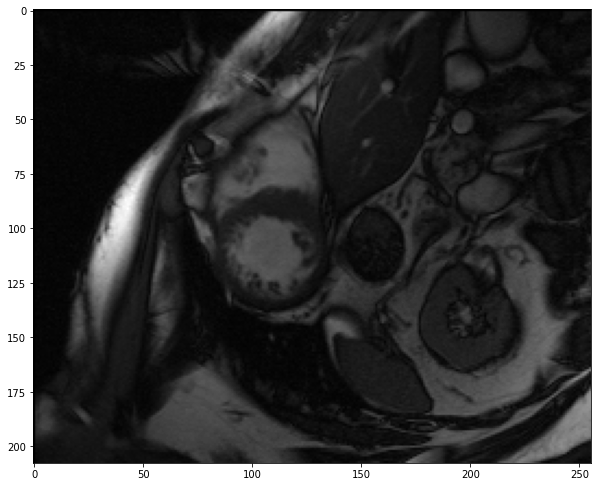

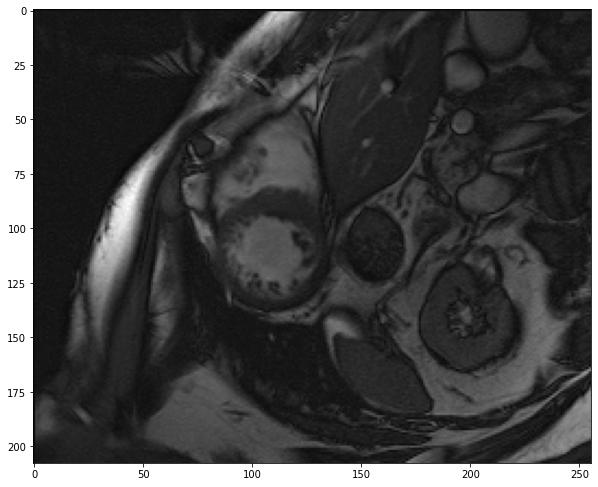

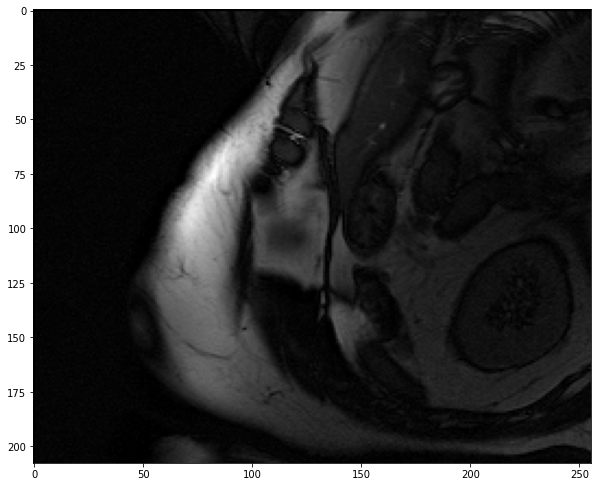

======================SharpOps===========================


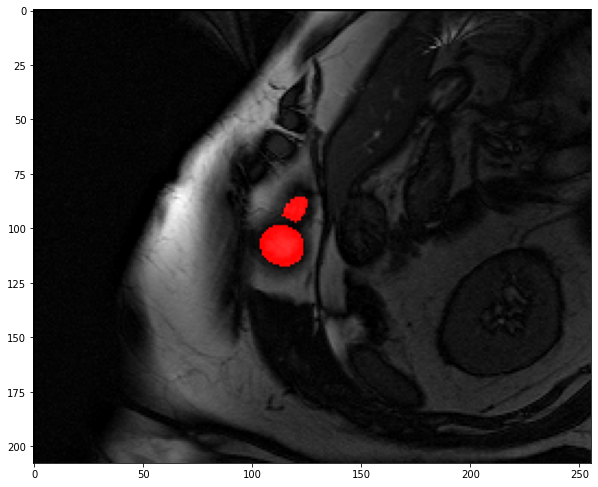

======================SharpOps===========================


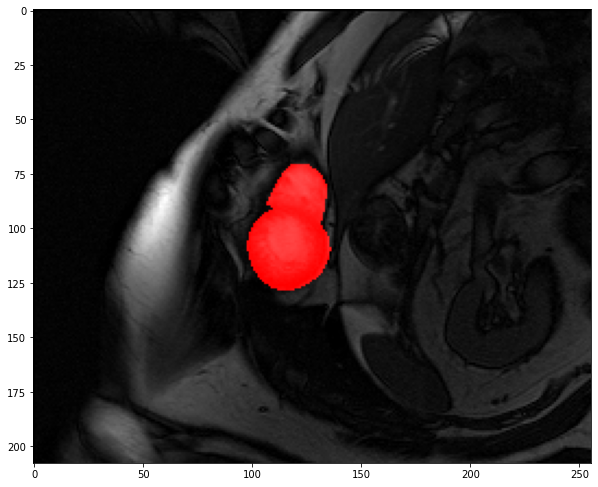

======================SharpOps===========================


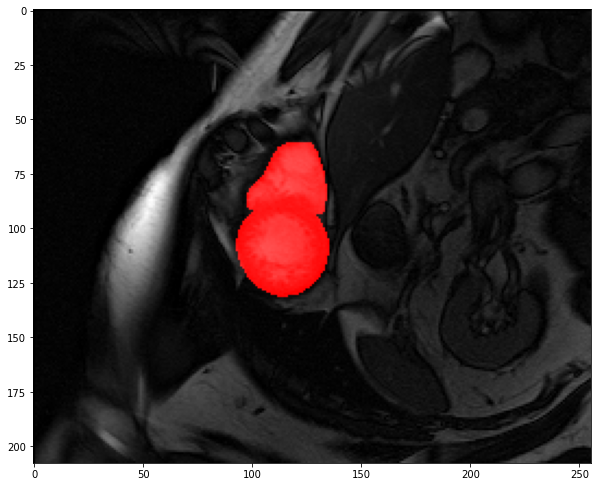

======================SharpOps===========================


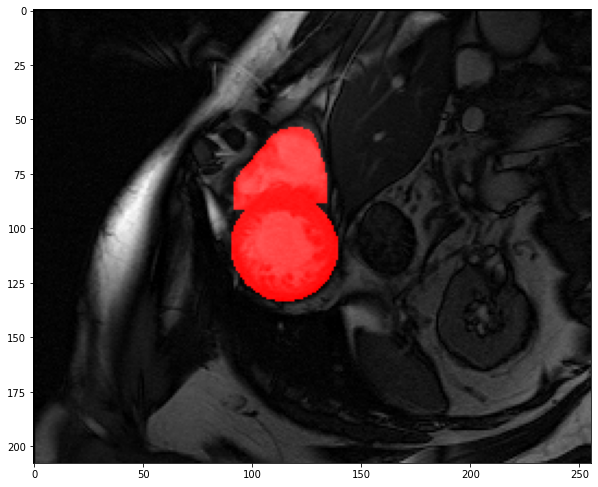

======================SharpOps===========================


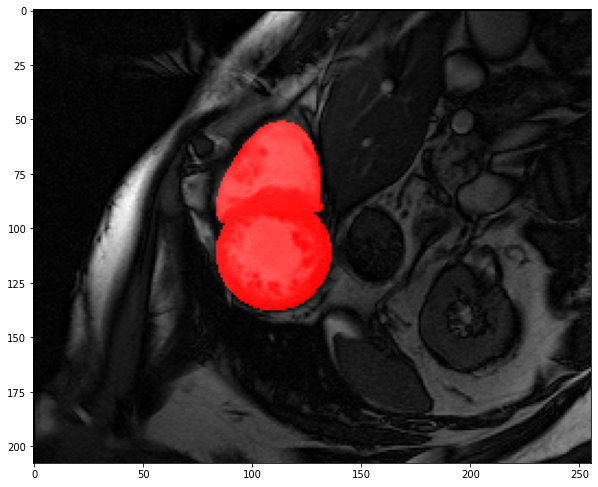

======================SharpOps===========================


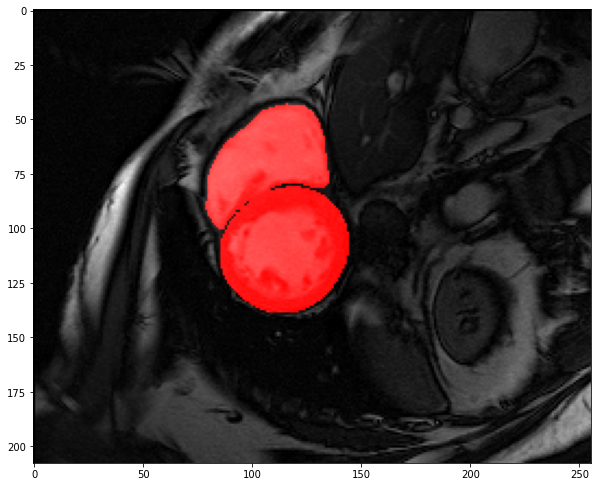

======================SharpOps===========================


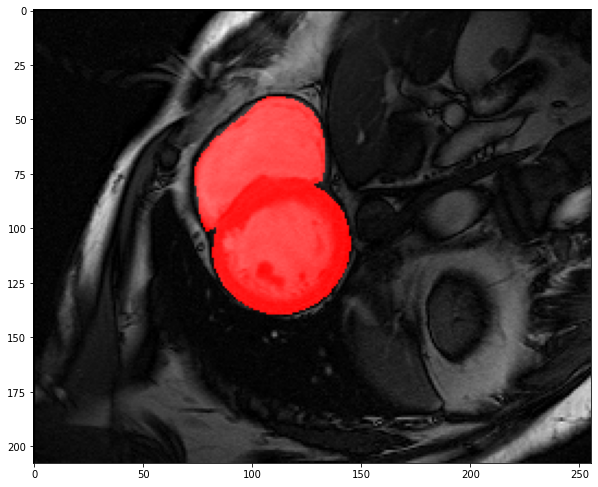

======================SharpOps===========================


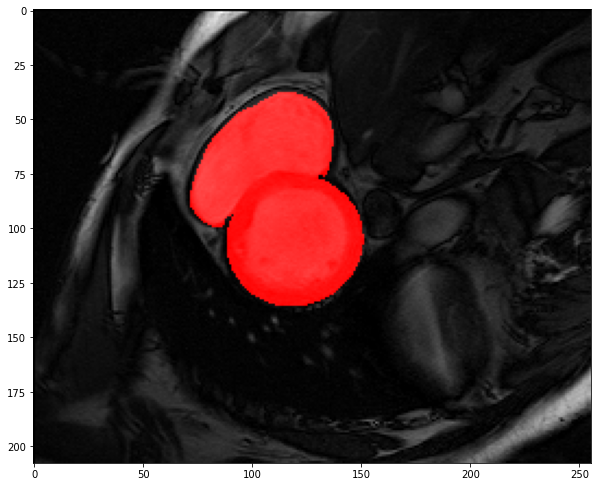

======================SharpOps===========================


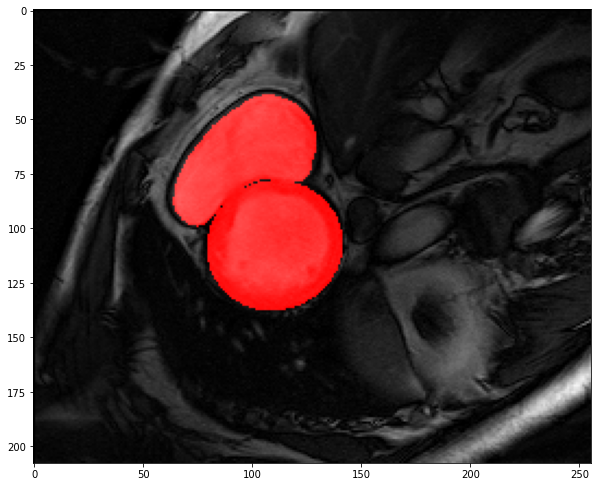

======================SharpOps===========================


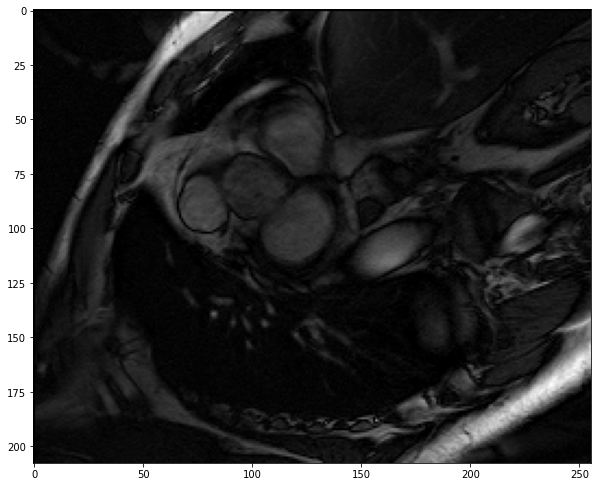

======================SharpOps===========================


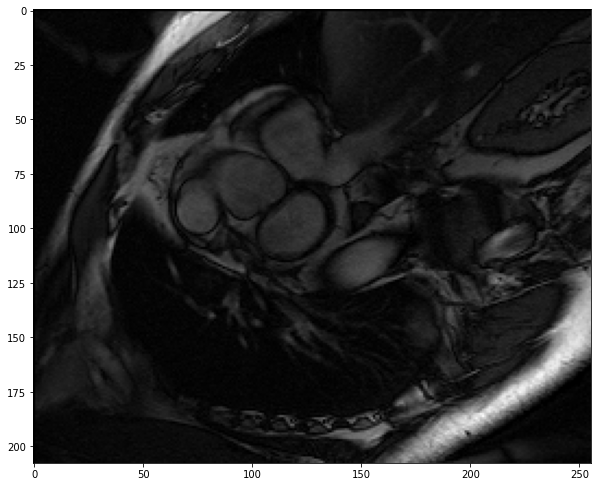

======================SharpOps===========================
###############################################
###############################################


In [7]:
for op, minval, maxval in aug_ops:
    if minval is not None and maxval is not None:
        val = float(opt.M) * (maxval - minval) + minval
    else:
        val = None
    inp, mask = op(vox_ed_data, vox_gt_ed_data, val)

    plt.imshow(vox_ed_data[:,:,5], cmap='gray')
    plt.show()
    plt.imshow(inp[:,:,5], cmap='gray')
    plt.show()

    for i in range(inp.shape[2]):
        img_i = inp[:,:, i]
        mask_i = mask[:,:, i]

        img_i = np.expand_dims(img_i, axis=0) / (img_i.max() + 0.00001)
        mask_i = np.expand_dims(mask_i, axis=0) * np.expand_dims(np.expand_dims(np.array([255., 0., 0.]), axis=1), axis=1)

        img = np.clip(img_i + mask_i / 30, a_min=0.0, a_max=1.0)

        plt.imshow(img.transpose((1, 2, 0)))
        plt.show()
        print(f'======================{op.__class__.__name__}===========================')
    print('###############################################')
    print('###############################################')